<h2>Task 1. Implement Hill-Climber Algorithm </h2> which is capable of solving N-dimensional problem. In the code block you can find example objective functions. Feel free to use any multi-dimensional objective function. The idea is that your implementation works the same for 1-dim and N-dim objective functions.

In [1]:
import numpy as np

def objective1(x):
    a = 1
    b = 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

def objective2(x):
    sum_part = sum(x_i**2 for x_i in x) / 4000
    product_part = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
    return 1 + sum_part - product_part

def hill_climber(objective_function, dim, bounds=(-5, 5), step_size=0.1, max_iterations=1000, seed=None):
    if seed is not None:
        np.random.seed(seed)

    current_solution = np.random.uniform(bounds[0], bounds[1], dim)
    current_value = objective_function(current_solution)

    best_solution = current_solution.copy()
    best_value = current_value

    for iteration in range(max_iterations):
        neighbor = current_solution + np.random.uniform(-step_size, step_size, dim)
        neighbor = np.clip(neighbor, bounds[0], bounds[1])
        neighbor_value = objective_function(neighbor)

        if neighbor_value < current_value:
            current_solution = neighbor
            current_value = neighbor_value

            if current_value < best_value:
                best_solution = current_solution.copy()
                best_value = current_value

    return best_solution, best_value


x = np.array([0.2, 1.0, 23.3, 1.2, 2.5])
print(f'objective2 function value at {x}: {objective2(x)}')
x = np.array([1.2, 23.2])
print(f'objective1 function value at {x}: {objective1(x)}')

best_solution1, best_value1 = hill_climber(objective1, dim=2, seed=42)
best_solution2, best_value2 = hill_climber(objective2, dim=5, seed=42)

print("Best solution (obj1):", best_solution1)
print("Best value (obj1):", best_value1)
print("Best solution (obj2):", best_solution2)
print("Best value (obj2):", best_value2)


objective2 function value at [ 0.2  1.  23.3  1.2  2.5]: 0.9677290088723365
objective1 function value at [ 1.2 23.2]: 47349.799999999996
Best solution (obj1): [-1.36152295  1.84423496]
Best value (obj1): 5.585834228052206
Best solution (obj2): [ 0.0073115   4.43502964 -0.02438975 -0.03001606 -5.        ]
Best value (obj2): 0.39405160041442544


<h2> Task 2. Evaluate time complexity</h2> of your Hill-Climber implementation. This include varying the input size from, for example, 1 to 10000 ( you might need more) and record the running time each time. You can use this implementation for all time complexity evaluations later in the project. This should result in a similar table: <br>
<h2 style="text-align: center;">Time Complexity Evaluation Table</h2>
<table>
    <tr>
        <th>input_size_max_iter</th>
        <th>input_size_local_search</th>
        <th>time_max_iter (s)</th>
        <th>time_local_search (s)</th>
        <th>total_time (s)</th>
    </tr>
    <tr>
        <td>100</td>
        <td>50</td>
        <td>0.12</td>
        <td>0.05</td>
        <td>0.17</td>
    </tr>
    <tr>
        <td>200</td>
        <td>100</td>
        <td>0.25</td>
        <td>0.09</td>
        <td>0.34</td>
    </tr>
    <tr>
        <td>300</td>
        <td>150</td>
        <td>0.38</td>
        <td>0.12</td>
        <td>0.50</td>
    </tr>
    <tr>
        <td>400</td>
        <td>200</td>
        <td>0.51</td>
        <td>0.15</td>
        <td>0.66</td>
    </tr>
    <tr>
        <td>500</td>
        <td>250</td>
        <td>0.70</td>
        <td>0.19</td>
        <td>0.89</td>
    </tr>
    <tr>
        <td>600</td>
        <td>300</td>
        <td>0.85</td>
        <td>0.24</td>
        <td>1.09</td>
    </tr>
    <tr><td>....</td></tr>
</table>
Create line plots indicating O(m*n) time complexity, where m is max iter and n is local search iteration. You can compute "growth rate" of time between each i-th and i-1-th iteration and prove they are increased by m*n


Iterations | Dimensions | Total Time (s) | Time/Iter (s) | Time/Eval (s)
---------------------------------------------------------------------------
       100 |         50 |         0.0017 |      0.000017 |    0.00000034
       200 |        100 |         0.0039 |      0.000019 |    0.00000019
       500 |        250 |         0.0191 |      0.000038 |    0.00000015
      1000 |        500 |         0.0674 |      0.000067 |    0.00000013
      2000 |       1000 |         0.2571 |      0.000129 |    0.00000013
      5000 |       2500 |         1.5556 |      0.000311 |    0.00000012

Growth Rate Analysis:
Growth rate 1 (iters=200, dims=100): 0.00000014 s per evaluation
Growth rate 2 (iters=500, dims=250): 0.00000014 s per evaluation
Growth rate 3 (iters=1000, dims=500): 0.00000013 s per evaluation
Growth rate 4 (iters=2000, dims=1000): 0.00000013 s per evaluation
Growth rate 5 (iters=5000, dims=2500): 0.00000012 s per evaluation


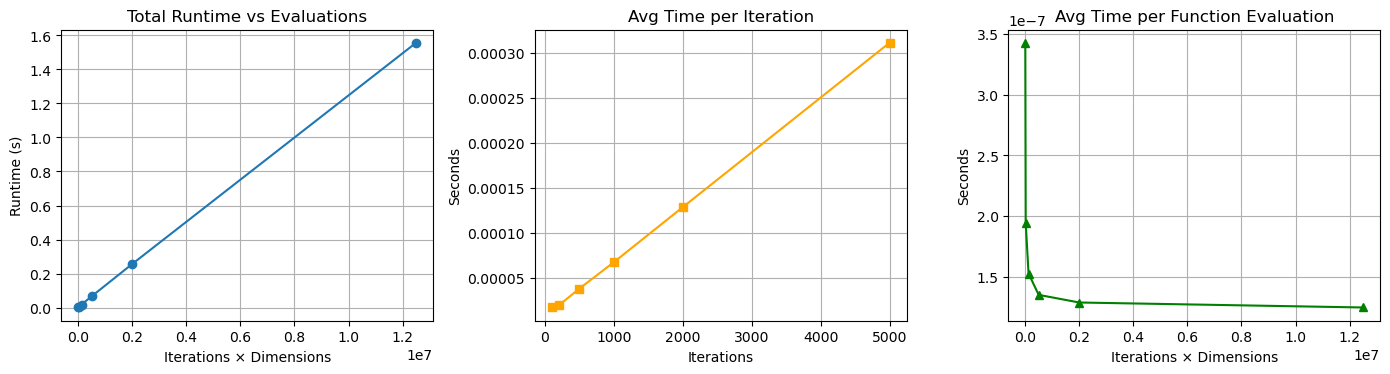

In [2]:
import time
import matplotlib.pyplot as plt

experiments = [(100, 50), (200, 100), (500, 250), (1000, 500), (2000, 1000), (5000, 2500)]

total_times = []
total_evals = []
iteration_times = []
evaluation_times = []

print("Iterations | Dimensions | Total Time (s) | Time/Iter (s) | Time/Eval (s)")
print("-" * 75)

for iters, dims in experiments:
    start = time.time()
    _ = hill_climber(objective2, dim=dims, bounds=(-5, 5), step_size=0.1, max_iterations=iters, seed=123)
    end = time.time()
    
    elapsed = end - start
    iter_time = elapsed / iters
    eval_time = elapsed / (iters * dims)
    
    print(f"{iters:10} | {dims:10} | {elapsed:14.4f} | {iter_time:13.6f} | {eval_time:13.8f}")
    
    total_times.append(elapsed)
    total_evals.append(iters * dims)
    iteration_times.append(iter_time)
    evaluation_times.append(eval_time)
    
print("\nGrowth Rate Analysis:")
for i in range(1, len(total_times)):
    delta_time = total_times[i] - total_times[i-1]
    delta_evals = total_evals[i] - total_evals[i-1]
    growth_rate = delta_time / delta_evals
    print(f"Growth rate {i} (iters={experiments[i][0]}, dims={experiments[i][1]}): {growth_rate:.8f} s per evaluation")


plt.figure(figsize=(14, 4))

# Plot 1: Total time vs total evaluations
plt.subplot(1, 3, 1)
plt.plot(total_evals, total_times, marker='o')
plt.title("Total Runtime vs Evaluations")
plt.xlabel("Iterations × Dimensions")
plt.ylabel("Runtime (s)")
plt.grid(True)

# Plot 2: Time per iteration
plt.subplot(1, 3, 2)
plt.plot([e[0] for e in experiments], iteration_times, marker='s', color='orange')
plt.title("Avg Time per Iteration")
plt.xlabel("Iterations")
plt.ylabel("Seconds")
plt.grid(True)

# Plot 3: Time per evaluation
plt.subplot(1, 3, 3)
plt.plot(total_evals, evaluation_times, marker='^', color='green')
plt.title("Avg Time per Function Evaluation")
plt.xlabel("Iterations × Dimensions")
plt.ylabel("Seconds")
plt.grid(True)

plt.tight_layout()
plt.show()
